## Lecture 1 - Introduction to Networks

In [1]:
import numpy as np
import pandas as pd
from nptyping import NDArray, Int, Shape
import networkx as nx
from matplotlib import pyplot as plt

-----

### 3. Introduction to Graphs

- Directed walk: Sequence of directed edges, such that every subsequent pair of edges shares a node.
- Directed trail: Walk where every edge in the sequence is unique
- Directed path: Trail where every node in the sequence is unique
- Directed cycle: Directed trail that starts and ends a the same node, such that all other nodes in the node sequence are unique

![Alt text](Images/network-concepts.PNG)

#### Types of Graphs

Identify the categories that each of the following graphs fall under.

Directed + Cyclic Graph


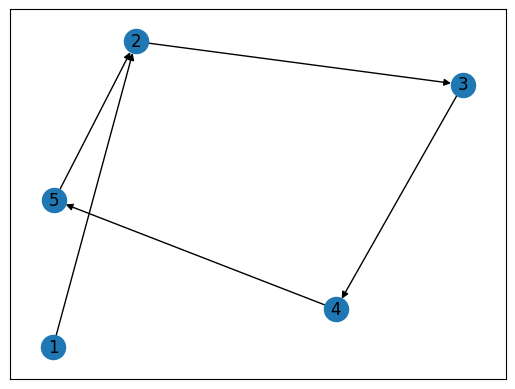

In [12]:
# Create a graph
G = nx.DiGraph(directed=True)

# V: Vertices
G.add_nodes_from(
    [1, 2, 3, 4, 5]
)

# E: Edges
G.add_edges_from([
    (1, 2), (2, 3), (3, 4), (4, 5), (5, 2),
])

# Draw the directed graph
print("Directed + Cyclic Graph")
nx.draw_networkx(G, arrows=True, with_labels=True)
plt.show()

Directed + Acyclic Graph


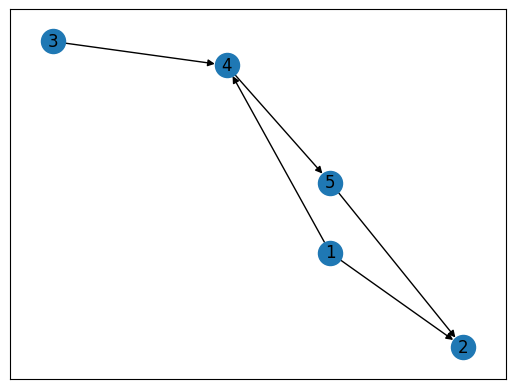

In [13]:
G = nx.DiGraph()

G.add_nodes_from(
    [1, 2, 3, 4, 5]
)
G.add_edges_from([
    (1, 2), (1, 4), (3, 4), (4, 5), (5, 2),
])

print("Directed + Acyclic Graph")
nx.draw_networkx(G, arrows=True, with_labels=True)
plt.show()

Undirected + Cyclic Graph


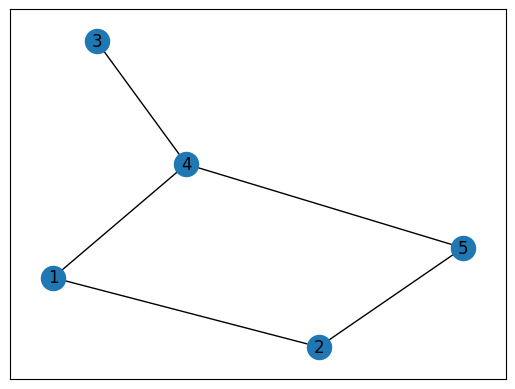

In [15]:
G = nx.Graph()
G.add_nodes_from(
    [1, 2, 3, 4, 5]
)
G.add_edges_from([
    (1, 2), (1, 4), (3, 4), (4, 5), (5, 2),
])

print("Undirected + Cyclic Graph")
nx.draw_networkx(G, arrows=True, with_labels=True)
plt.show()

Undirected + Cyclic Graph


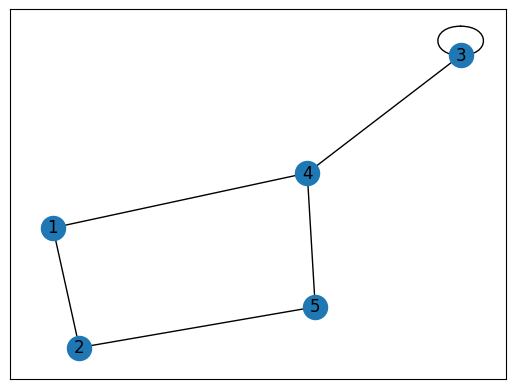

In [16]:
G = nx.Graph()
G.add_nodes_from(
    [1, 2, 3, 4, 5]
)
G.add_edges_from([
    (1, 2), (1, 4), (3, 4), (4, 5), (5, 2), (3, 3)
])

print("Multigraph")
nx.draw_networkx(G, arrows=True, with_labels=True)
plt.show()

Multigraph + Bipartite
Bipartite:  True


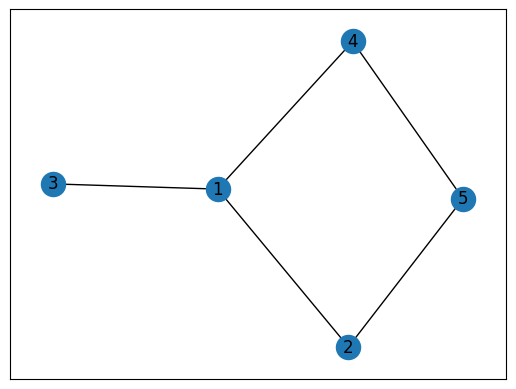

In [19]:
G = nx.Graph()
G.add_nodes_from(
    [1, 2, 3, 4, 5]
)
G.add_edges_from([
    (1, 2), (1, 4), (3, 1), (4, 5), (5, 2), 
])

print("Multigraph + Bipartite")
print("Bipartite: ", nx.is_bipartite(G))
nx.draw_networkx(G, arrows=True, with_labels=True)
plt.show()

-----

### 5. Adjacency Matrix

#### Adjacency Matrix - Walks of Length 2 and 3

In [24]:
# Sample adjacency matrix
A = np.array([
    [1, 1, 0],
    [0, 0, 1],
    [1, 0, 0]
])

# Calculate the walks of length 2
A2 = A @ A
print(A2)
print("Walks of length 2 from node 1 to 2:", A2[0, 1])

# Calculate the walks of length 3
A3 = A @ A @ A
print(A3)
print("Walks of length 3 from node 1 to 2:", A3[0, 1])

[[1 1 1]
 [1 0 0]
 [1 1 0]]
Walks of length 2 from node 1 to 2: 1
[[2 1 1]
 [1 1 0]
 [1 1 1]]
Walks of length 3 from node 1 to 2: 1


-------

### 6. Graph Properties and Metrics - I

#### Adjacency Matrix, Connected Components

Undirected Graph
Connected:  True
Minimum exponent:  4
Maximum degree:  5
Walks of length 5 from node 0 to 0: 46
Is the statement true?  True


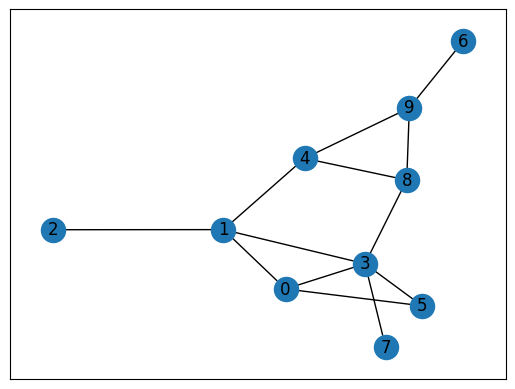

In [30]:
A = np.array([
    [0, 1, 0, 1, 0, 1, 0, 0, 0, 0],
	[1, 0, 1, 1, 1, 0, 0, 0, 0, 0],
	[0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
	[1, 1, 0, 0, 0, 1, 0, 1, 1, 0],
	[0, 1, 0, 0, 0, 0, 0, 0, 1, 1],
	[1, 0, 0, 1, 0, 0, 0, 0, 0, 0],
	[0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
	[0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
	[0, 0, 0, 1, 1, 0, 0, 0, 0, 1],
	[0, 0, 0, 0, 1, 0, 1, 0, 1, 0]
])

# ============================================== #
# SYMMETRY                                       #
# ============================================== #

# Check if the matrix is symmetric
is_symmetric = np.allclose(A, A.T)
if is_symmetric:
	print("Undirected Graph")
	G = nx.from_numpy_array(A, create_using=nx.Graph)
else:
	print("Directed Graph")
	G = nx.from_numpy_array(A, create_using=nx.DiGraph)

# ============================================== #
# CONNECTIVITY                                   #
# ============================================== #

# Is the graph connected
# The graph is connected since there is a path from every node to every other node
print("Connected: ", nx.is_connected(G))

# ============================================== #
# MINIMUM EXPONENT                               #
# ============================================== #

# Initialize the exponent
exponent = 1

# What is the minimum exponent of the adjacency matrix to make the graph connected
# We create an initial A^l matrix
Al = A.copy()
for i in range(1, 10):

	# Multiply the matrix by itself to increase the exponent by 1
	Al = Al @ A	
	exponent += 1

	# Check if all of the entries are different from 0
	if np.all(Al):

		# Remember that "i" starts at 0, but by the first iteration we are calculating
		# A^2, so we need to add 2 to the final printed exponent
		print("Minimum exponent: ", exponent)
		break

# ============================================== #
# MAXIMUM DEGREE                                 #
# ============================================== #

# What is the maximum degree of the graph?
# The degree of a node is calculated as the number of edges connected to it
degrees = [G.degree(n) for n in G.nodes()]
print("Maximum degree: ", max(degrees))

# ============================================== #
# WALKS OF LENGTH 5 FROM NODE 0 TO 0             #
# ============================================== #

# Calculate the walks of length 5 from node 0 to 0
A5 = A @ A @ A @ A @ A
print("Walks of length 5 from node 0 to 0:", A5[0, 0])

# ============================================== #
# STATEMENT                                      #
# ============================================== #

# The statement says that the for an indirected graph, that is not weighted or a multigraph,
# the diagonal entries of A^2 are equal to the degree of nodes. Is this true or false?

# Get the diagonal entries of A^2
A2 = A @ A
diagonal_entries = np.diag(A2)

# Get the degrees of the nodes
degrees = [G.degree(n) for n in G.nodes()]

# Check if the diagonal entries are equal to the degrees
print("Is the statement true? ", np.allclose(diagonal_entries, degrees))

# ============================================== #
# PLOT                                           #
# ============================================== #

# Draw the graph
nx.draw_networkx(G, arrows=True, with_labels=True)
plt.show()

### 7. Graph Properties and Metrics - II

#### Small Graph

In [37]:
# Load the directed graph edge list
G = nx.read_edgelist("Lecture Materials/directed_graph.txt", create_using=nx.DiGraph)

# Get the number of nodes and edges
print("Number of nodes: ", G.number_of_nodes())
print("Number of edges: ", G.number_of_edges())

# ============================================== #
# ARE THERE SELF LOOPS?                          #
# ============================================== #

# Get the diagonal of the adjacency matrix
A = nx.to_numpy_array(G)
diagonal = np.diag(A)

# Check if the diagonal contains any 1s (self-loops)
if np.any(diagonal):
    print("Self-loops present")

# ============================================== #
# CHECK FOR NODES WITH NO INCOMING EDGES         #
# ============================================== #

# Create a copy of the adjacency matrix and set the diagonal to 0
# (Done to remove the self-loops)
A_copy = A.copy()
A_copy[np.diag_indices_from(A_copy)] = 0

# Check if there are any nodes with no incoming edges
# Steps:
# 1. Sum the columns of the adjacency matrix
# 2. Get the indices of the columns that sum to 0
np.where(A_copy.sum(axis=0) == 0)

# ============================================== #
# MAXIMUM LIKELIHOOD ESTIMATE                    #
# ============================================== #

# If a connection were to exist from all nodes to all other nodes, what
# would be the maximum number of edges?
max_edges = G.number_of_nodes() * G.number_of_nodes()

# The graph was generated using the following method: The number of nodes was fixed (100) and 
# every possible directed edge was selected with a probability "p". What is the maximum likelihood
# estimate of "p"?
print("Maximum likelihood estimate of p: ", G.number_of_edges() / max_edges)

# ============================================== #
# P VALUE                                        #
# ============================================== #

# Probability of generating a directed connection between two nodes
p = 0.1

# Sample mean: Fraction of the number of edges observed to the
# total number of possible edges
sample_mean = G.number_of_edges() / max_edges


Number of nodes:  100
Number of edges:  1030
Self-loops present
Maximum likelihood estimate of p:  0.103


#### Circle Graph

Number of edges:  13
Edge density:  0.16666666666666666


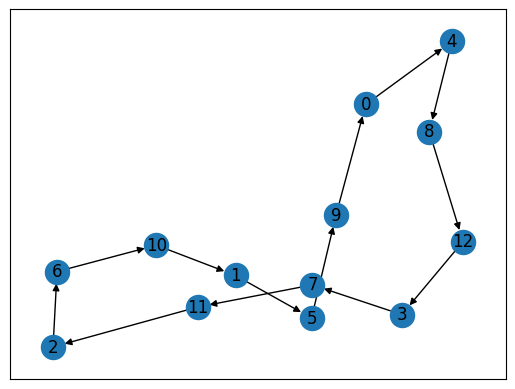

In [2]:
# Number of nodes
# (Must be a prime number)
n = 13

# Parameter k (integer in the range [0, n] that parametrizes the graph)
k = 4

# The node "i" is connected to node (i + k) % n
# We create it by structuring the adjacency matrix by initially setting all entries to 0
A = np.zeros((n, n))
for i in range(n):
    A[i, (i + k) % n] = 1

# Create the graph 
G = nx.from_numpy_array(A, create_using=nx.DiGraph)

# Number of edges
print("Number of edges: ", G.number_of_edges())

# Edge density
binomial_coefficient = np.math.factorial(n) / (np.math.factorial(2) * np.math.factorial(n - 2))
edge_density = G.number_of_edges() / binomial_coefficient
print("Edge density: ", edge_density)

# Plot the graph
nx.draw_networkx(G, arrows=True, with_labels=True)

----

### 8. Graph Properties and Metrics - III

![Alt text](Images/length-of-path.png)

#### Line Graph

Average Distance:  2.6666666666666665
Average Distance Estimate:  2.6666666666666665


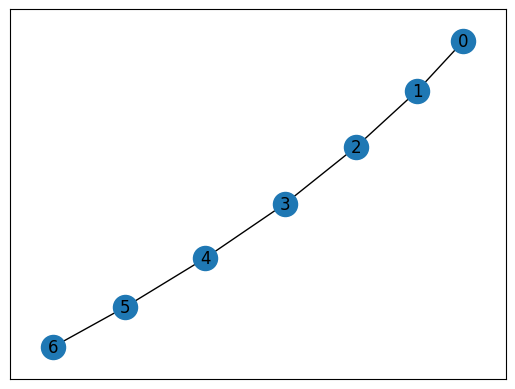

In [21]:
# Set the number of nodes
n = 7

# Build a graph that consists of a straight line of interconnected nodes (n = 5)
G = nx.path_graph(n)

# Compute the distance from each node to every other node
distance_matrix = nx.floyd_warshall_numpy(G)

# Get the top half of the matrix (excluding the diagonal)
distances = np.triu(distance_matrix, k=1)

# Add up all of the distances
distance_sum = np.sum(distances)

# Get the total number of combinations given the number of nodes
combinations = np.math.factorial(n) / (np.math.factorial(2) * np.math.factorial(n - 2))

# Calculate the average distance
average_distance = distance_sum / combinations
print("Average Distance: ", average_distance)
print("Average Distance Estimate: ", (n+1)/3)

# Plot the graph
nx.draw_networkx(G, arrows=True, with_labels=True)
plt.show()

In the previous section I calculated the average path length experimentally. Here is the actual mathematical solution for the problem. It makes sense, I just didnt figure it out at the time.

![Alt text](Images/line-graph-average-path.png)

#### Star Graph

![Alt text](Images/graph-basics-average-distance-in-star-graph.png)

Number of Combinations:  15.0
Estimated Number of Combinations:  15.0

Average Distance:  2.4


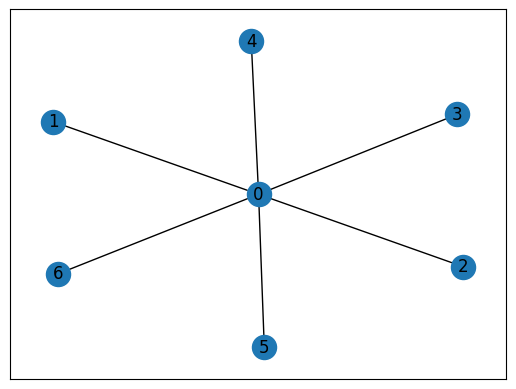

In [38]:
# Number of nodes
n = 6

# Build a graph that consists of a central node connected to all other nodes, where each external
# node is just connected to the central node
G = nx.star_graph(n)

# Compute the sum of the distances from each node to every other node
distance_matrix = nx.floyd_warshall_numpy(G)
distance_matrix_top = np.triu(distance_matrix, k=1)
distance_sum = np.sum(distance_matrix_top)

# Get the total number of combinations given the number of nodes
combinations = np.math.factorial(n) / (np.math.factorial(2) * np.math.factorial(n - 2))
print("Number of Combinations: ", combinations)
print("Estimated Number of Combinations: ", n * (n - 1) / 2)
print()

# Calculate the average distance
average_distance = distance_sum / combinations
print("Average Distance: ", average_distance)

# Plot the graph
nx.draw_networkx(G, arrows=True, with_labels=True)
plt.show()

----

### 9. Graph Metrics - A Measure of Clustering and Modularity

#### Clustering Coefficient of an Almost Complete Graph

Number of Closed Triplets:  6.0
Number of Connected Triplets:  36.0
Clustering Coefficient:  0.3333333333333333
Clustering Coefficient Estimate:  6.0


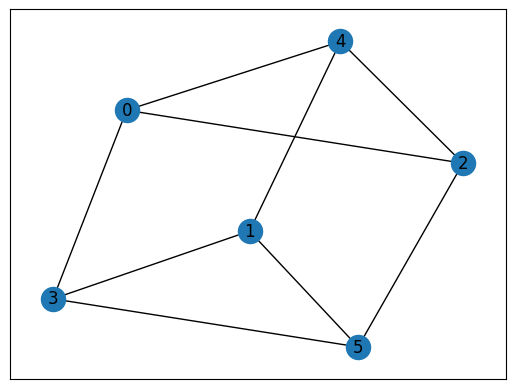

In [5]:
# Number of nodes 
n = 6

# Build a graph where every node is connected to every other node
G = nx.complete_graph(n)

# Remove an edge from "n" nodes
for i in range(n):
    G.remove_edge(i, (i + 1) % n)

# Get the cube of the adjacency matrix
A = nx.to_numpy_array(G)
A3 = A @ A @ A

# Get the trace of the cube of the adjacency matrix. Half of this value
# consists of the number of triplets
A3_trace = np.trace(A3)
closed_triplets = A3_trace.copy() / 2
print("Number of Closed Triplets: ", closed_triplets)

# Get the degree of each node
degrees = np.sum(A, axis=1)
ki = degrees.copy()

# The number of connected triplets is defined as sum(ki* (ki - 1) / 2)
connected_triplets = np.sum(ki * (ki - 1))
print("Number of Connected Triplets: ", connected_triplets)

# Compute the clustering coefficient
clustering_coefficient = nx.average_clustering(G)
print("Clustering Coefficient: ", clustering_coefficient)
print("Clustering Coefficient Estimate: ", connected_triplets / closed_triplets)

# Plot the graph
nx.draw_networkx(G, arrows=True, with_labels=True)
plt.show()


#### Modularity of a Small Graph

Modularity:  -0.2041420118343195


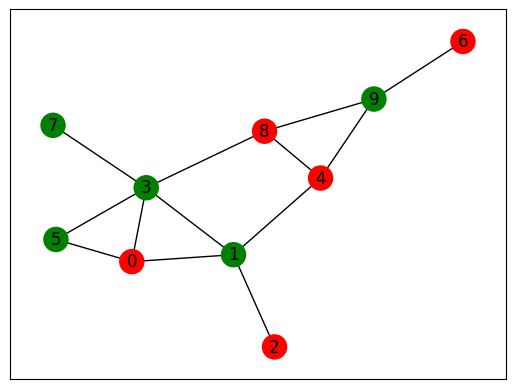

In [20]:
# Adjacency matrix
A = np.array([
    [0, 1, 0, 1, 0, 1, 0, 0, 0, 0],
	[1, 0, 1, 1, 1, 0, 0, 0, 0, 0],
	[0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
	[1, 1, 0, 0, 0, 1, 0, 1, 1, 0],
	[0, 1, 0, 0, 0, 0, 0, 0, 1, 1],
	[1, 0, 0, 1, 0, 0, 0, 0, 0, 0],
	[0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
	[0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
	[0, 0, 0, 1, 1, 0, 0, 0, 0, 1],
	[0, 0, 0, 0, 1, 0, 1, 0, 1, 0]
])

# Create a graph from the adjacency matrix
# If the matrix is symmetric, then the graph is undirected
if np.allclose(A, A.T):
    G = nx.from_numpy_array(A)
else:
    G = nx.from_numpy_array(A, create_using=nx.DiGraph)

# Initialize the color map used to distinguish between the two node types
color_map = []

# Assign different types to different nodes
for i in range(G.number_of_nodes()):
    if i%2 == 0:
        G.nodes[i]['type'] = 'A'
        color_map.append('red')
    else:
        G.nodes[i]['type'] = 'B'
        color_map.append('green')

# Get the number of edges 
m = G.number_of_edges()

# Initialize the sum of ( Aij - (ki * kj) / 2m ) * delta(ti, tj)
modularity_sum = 0

# Iterate through each node pair (i, j)
for i in range(G.number_of_nodes()):
    for j in range(G.number_of_nodes()):

        # Get the type of each node
        ti = G.nodes[i]['type']
        tj = G.nodes[j]['type']

        # Calculate the delta function (1 if the types are the same, 0 otherwise)
        delta = 1 if ti == tj else 0

        # Get the degree of each node
        ki = G.degree(i)
        kj = G.degree(j)

        # Get the adjacency matrix entry for node pair (i, j)
        Aij = A[i][j]

        # Calculate the sum of Aij - (ki * kj) / 2m
        modularity_sum += ( Aij - ((ki * kj) / (2 * m)) ) * delta

# Divide the sum by 2m
modularity = modularity_sum / (2 * m)
print("Modularity: ", modularity)

# Plot the graph
nx.draw_networkx(G, arrows=True, node_color=color_map, with_labels=True)
plt.show()